<a href="https://colab.research.google.com/github/tanishqnalloju/mld-analysis/blob/main/MLD_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive/')
nifty_50_path = '/content/drive/MyDrive/projects_data/NIFTY 50_Historical_PR_03111995to26022024.csv'
nifty_alpha_50_path = '/content/drive/MyDrive/projects_data/NIFTY ALPHA 50_Historical_PR_03111995to26022024.csv'
nifty_gsec_path = '/content/drive/MyDrive/projects_data/NIFTY 10 YR BENCHMARK G-SEC_Historical_PR_03111995to26022024.csv'
reporates_path = '/content/drive/MyDrive/projects_data/repo_rev_rate.csv'


Mounted at /content/drive/


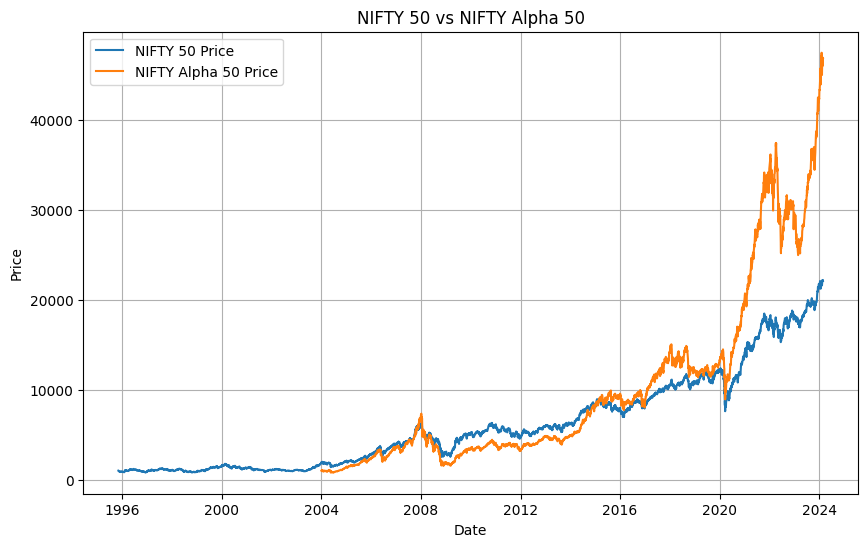

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV file into a DataFrame
n50_df = pd.read_csv(nifty_50_path)
na50_df = pd.read_csv(nifty_alpha_50_path)
ngsec_df = pd.read_csv(nifty_gsec_path)
rprate_df = pd.read_csv(reporates_path)
# Convert the 'Date' column to datetime format
n50_df['Date'] = pd.to_datetime(n50_df['Date'])
na50_df['Date'] = pd.to_datetime(na50_df['Date'])
ngsec_df['Date'] = pd.to_datetime(ngsec_df['Date'])
rprate_df['Date'] = pd.to_datetime(rprate_df['Date'])
# Set 'Date' and 'Close' columns from Object to datetime for 'Date', 'reporate' as 'Close'
rprate_df['Date'] = pd.to_datetime(rprate_df['Date'])
rprate_df['Close'] = rprate_df['reporate']

# Calculate the 26-month moving average of the 'Close' column
# n50_df['26_MA'] = n50_df['Close'].rolling(window=30).mean()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n50_df['Date'], n50_df['Close'], label='NIFTY 50 Price')
# plt.plot(n50_df['Date'], n50_df['26_MA'], label='26-Month Moving Average')
plt.plot(na50_df['Date'], na50_df['Close'], label='NIFTY Alpha 50 Price')
plt.title('NIFTY 50 vs NIFTY Alpha 50')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()


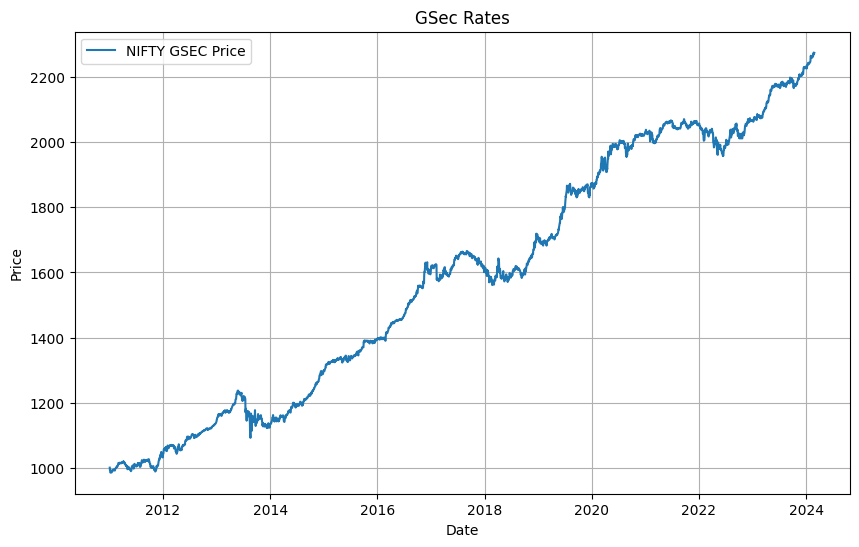

In [4]:
plt.figure(figsize=(10, 6))
plt.plot(ngsec_df['Date'], ngsec_df['Close'], label='NIFTY GSEC Price')
plt.title('GSec Rates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

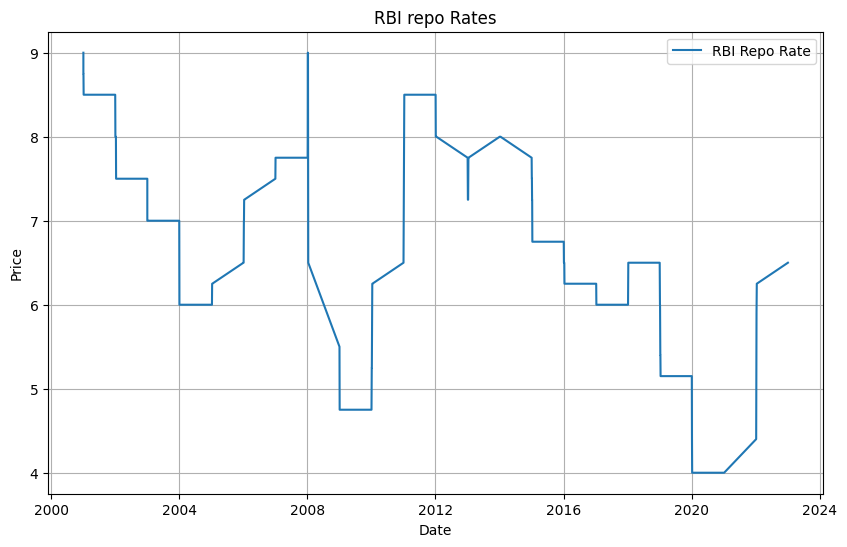

In [5]:
plt.figure(figsize=(10, 6))
plt.plot(rprate_df['Date'], rprate_df['Close'], label='RBI Repo Rate')
plt.title('RBI repo Rates')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

GSEC Rates without smoohting over monthly averages, plotting over direct in time changes to the specific month in a financial year.

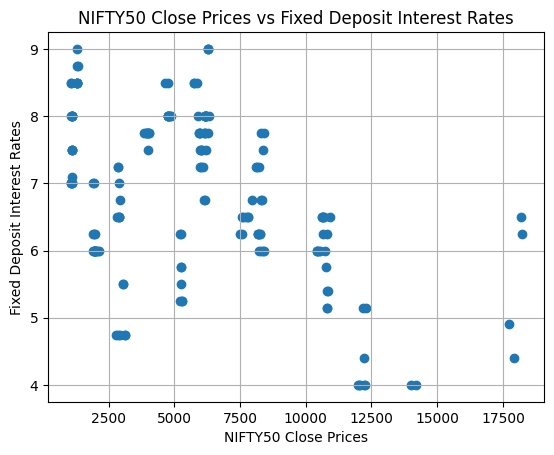

Correlation between NIFTY50 Close Prices and RBI Repo Rates: -0.47213734203709923


In [7]:

# Merge the two dataframes on date
merged_df = pd.merge(n50_df, rprate_df, on='Date', how='inner')
# Calculate correlation between NIFTY50 close prices and fixed deposit interest rates
correlation = merged_df['Close_x'].corr(merged_df['reporate'])

# Plotting
plt.scatter(merged_df['Close_x'], merged_df['reporate'])
plt.title('NIFTY50 Close Prices vs Fixed Deposit Interest Rates')
plt.xlabel('NIFTY50 Close Prices')
plt.ylabel('Fixed Deposit Interest Rates')
plt.grid(True)
plt.show()

print("Correlation between NIFTY50 Close Prices and RBI Repo Rates:", correlation)


Negative correaltion relates to increase in NIFTY 50 indice when the repo rates fall down underscoring the RBI repo rate cut for growth by the central bank.

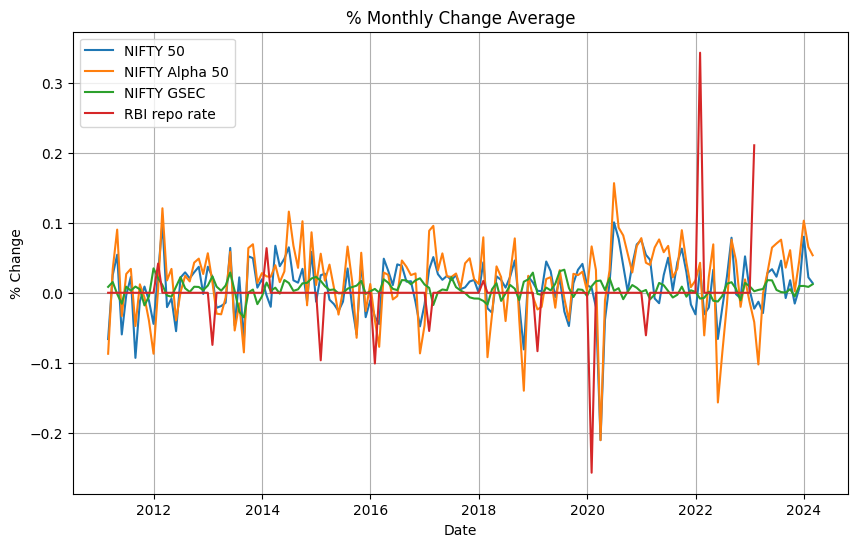

In [9]:
# Plotting

df_list = [n50_df, na50_df, ngsec_df, rprate_df]
mva_label_list = ["NIFTY 50", "NIFTY Alpha 50", "NIFTY GSEC", "RBI repo rate"]
monthly_df = []

rprate_df['Close'] = rprate_df['reporate']
rprate_df = rprate_df[::-1]

min_start_point = max(min(n50_df['Date']), min(na50_df['Date']), min(ngsec_df['Date']), min(rprate_df['Date']))
min_start_point = min_start_point.to_pydatetime()


for df in df_list:
  df = df[df['Date'] >= min_start_point]
  monthly_mean = df.set_index('Date')
  # Resample daily data to monthly data and aggregate using mean..
  monthly_mean.index = pd.to_datetime(monthly_mean.index)
  monthly_mean = monthly_mean.resample('M').agg({'Close': 'mean'})['Close'].reset_index()
  monthly_mean = monthly_mean.rename(columns={'index': 'Date'})
  monthly_df.append(monthly_mean)

for df in monthly_df:
  # print(df.isna().sum())
  df['change'] = df['Close'].pct_change(periods=1)

plt.figure(figsize=(10, 6))
# plt.plot(df['Date'], df['Close'], label='NIFTY Close Price')
for index, df in enumerate(monthly_df):
  plt.plot(df['Date'], df['change'], label = mva_label_list[index])

# plt.plot(n50_df['Date'], n50_df['26_MA'].pct_change(periods=1), label='NIFTY 50 % change')
plt.title('% Monthly Change Average')
plt.xlabel('Date')
plt.ylabel('% Change')
plt.legend()
plt.grid(True)
plt.show()

Average monthly rates show that the NIFTY GSEC and NIFTY 50 have less sudden changes and instead gradual. On the other hand RBI Repo rate cuts have been sharp increase or decrease. Meanwhile NIFTY Alpha 50 has similar behavior but over a longer frequency than that of RBI Repo rates.

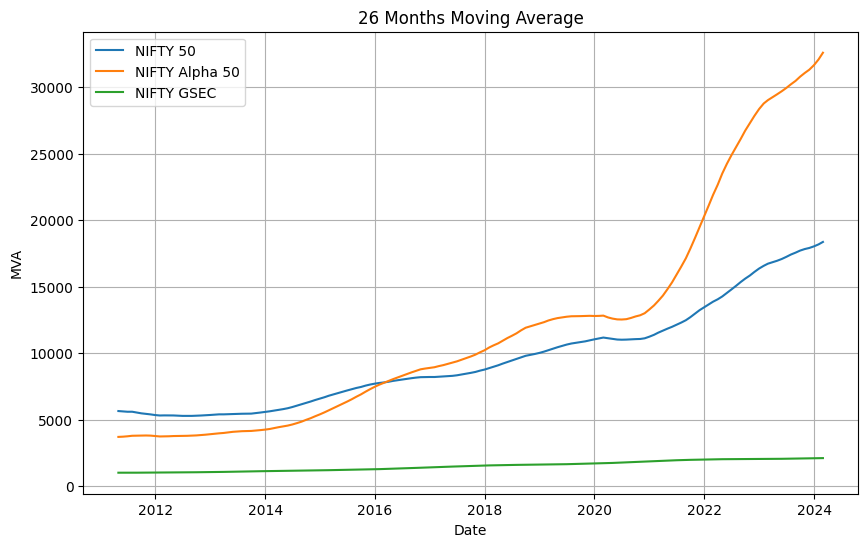

In [10]:
plt.figure(figsize=(10, 6))
for index, df in enumerate(monthly_df[:3]):
  df['26_MA'] = df['Close'].rolling(window=26, min_periods = 4).mean()
  # print(df.tail())
  plt.plot(df['Date'], df['26_MA'], label = mva_label_list[index])

plt.title('26 Months Moving Average')
plt.xlabel('Date')
plt.ylabel('MVA')
plt.legend()
plt.grid(True)
plt.show()

26 months Moving Average to compare return over a long term for NIFTY 50, NIFTY Alpha 50, and NIFTY GSEC Indices. While GSEC Indice is increasing gradually, there has been significant increase in moving averages for both NIFTY 50 and Alpha 50. The Alpha 50 seems to have outperformed with combined gains of both NIFTY 50 and GSEC Indices at the end although it had meagre gains during 2011 -2015 suggesting more bearish runs in certain stocks other than the companies in NIFTY 50.

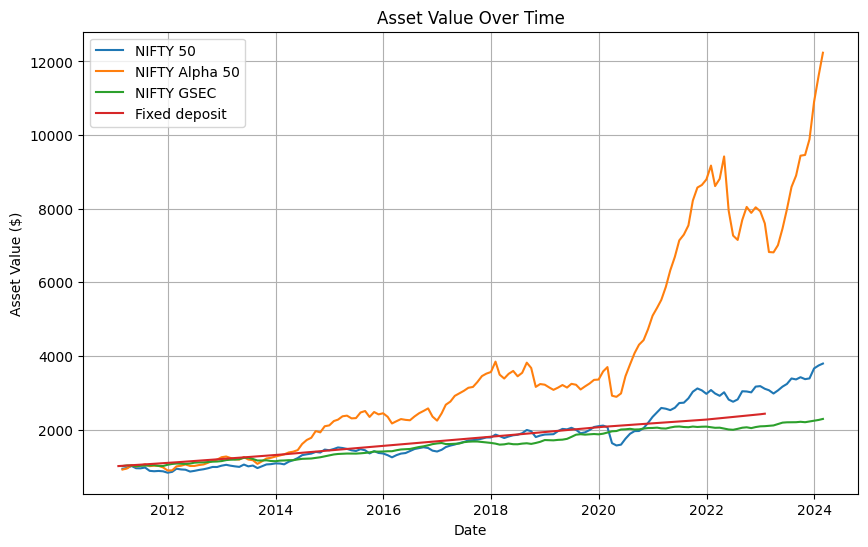

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

label_list = ["NIFTY 50", "NIFTY Alpha 50", "NIFTY GSEC", "Fixed deposit"]

# Assuming monthly_df is already defined

initial_investment = 1000  # Initial investment amount

asset_values = pd.DataFrame(index=pd.date_range(start='2000-01-01', end='2024-12-31', freq='M'))
monthly_df[-1]['Close'].fillna(method='ffill', inplace=True)

for index, df in enumerate(monthly_df):
    if index == len(monthly_df) - 1:  # Assuming the last DataFrame represents fixed deposit rates
        # Calculate interest rates for fixed deposit
        # Accumulate the interest rates with an average 15% premium over RBI rates
        df['monthly_interest_rate'] = 1.15 * df['Close'] / (12 * 100)
        df['asset_value'] = initial_investment * (1 + df['monthly_interest_rate']).cumprod()
        asset_values[label_list[index]] = df.set_index('Date')['asset_value']
    else:
        df['asset_value'] = initial_investment * (1 + df['change']).cumprod()
        asset_values[label_list[index]] = df.set_index('Date')['asset_value']

plt.figure(figsize=(10, 6))
# print(asset_values.columns)
for label in asset_values.columns:
    plt.plot(asset_values.index, asset_values[label], label=label)


plt.title('Asset Value Over Time')
plt.xlabel('Date')
plt.ylabel('Asset Value ($)')
plt.legend()
plt.grid(True)
plt.show()


Investing in a fixed deposit steadilt beat returns from a NIFTY 50 Indice until 2021 indicating more investor participation and bearish runs in NIFTY 50 and NIFTY Alpha 50. This can also correlated to the decrease in RBI repo rates in Q1 2020 aiding in overall growth rates by the Q2 in 2021. Supprisingly the markets have had more increase in returns although repo rates have increased in Q4 of 2021.

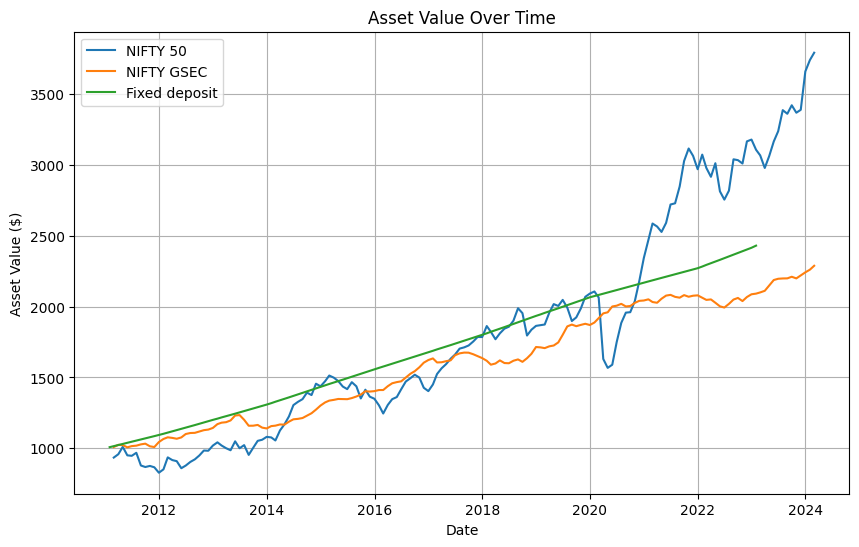

In [13]:

plt.figure(figsize=(10, 6))
# print(asset_values.columns)
for label in asset_values.columns:
  if label != 'NIFTY Alpha 50':
    plt.plot(asset_values.index, asset_values[label], label=label)


plt.title('Asset Value Over Time')
plt.xlabel('Date')
plt.ylabel('Asset Value ($)')
plt.legend()
plt.grid(True)
plt.show()

In [150]:
monthly_df[-1].tail()

,Date,Close,change,monthly_interest_rate,asset_value
140,2022-09-30,5.37,0.000000,0.004923,2290.790808
141,2022-10-31,5.37,0.000000,0.004923,2302.067226
142,2022-11-30,5.37,0.000000,0.004923,2313.399152
143,2022-12-31,5.37,0.000000,0.004923,2324.786859
144,2023-01-31,6.50,0.210428,0.005958,2338.638714


In [14]:
# Calculate monthly returns
n50_df['Monthly_Return'] = n50_df['Close'].pct_change().fillna(0)

# Average Monthly Return
average_monthly_return = n50_df['Monthly_Return'].mean()

# Volatility (standard deviation of monthly returns)
volatility = n50_df['Monthly_Return'].std()

# Correlation with Market Indices (example: S&P 500)
# Assuming you have another dataframe 'sp500_df' containing S&P 500 data
correlation = n50_df['Close'].corr(na50_df['Close'])

# Maximum Drawdown
cumulative_returns = (1 + n50_df['Monthly_Return']).cumprod()
peak = cumulative_returns.expanding(min_periods=1).max()
drawdown = (cumulative_returns - peak) / peak
max_drawdown = drawdown.min()

# Sharpe Ratio (assuming risk-free rate of 0 for simplicity)
risk_free_rate = 0
sharpe_ratio = (average_monthly_return - risk_free_rate) / volatility

# Displaying the calculated metrics
print("Average Monthly Return:", average_monthly_return)
print("Volatility:", volatility)
print("Correlation with S&P 500:", correlation)
print("Maximum Drawdown:", max_drawdown)
print("Sharpe Ratio:", sharpe_ratio)


Average Monthly Return: -0.0003335827015857636
Volatility: 0.014575673003190324
Correlation with S&P 500: 0.9699683160479329
Maximum Drawdown: -0.9645256318794467
Sharpe Ratio: -0.022886264086244872
